In [21]:
import katdal
import matplotlib
import matplotlib.pyplot as plt
%pylab inline
import numpy, string

Populating the interactive namespace from numpy and matplotlib


In [22]:
filename='/var/kat/archive/data/MeerKATAR1/telescope_products/2016/04/29/1461908252.h5'

In [23]:
h5 = katdal.open(filename, quicklook=True)
passband = h5.channel_freqs
channels = numpy.array(h5.channels)
ants = h5.ants


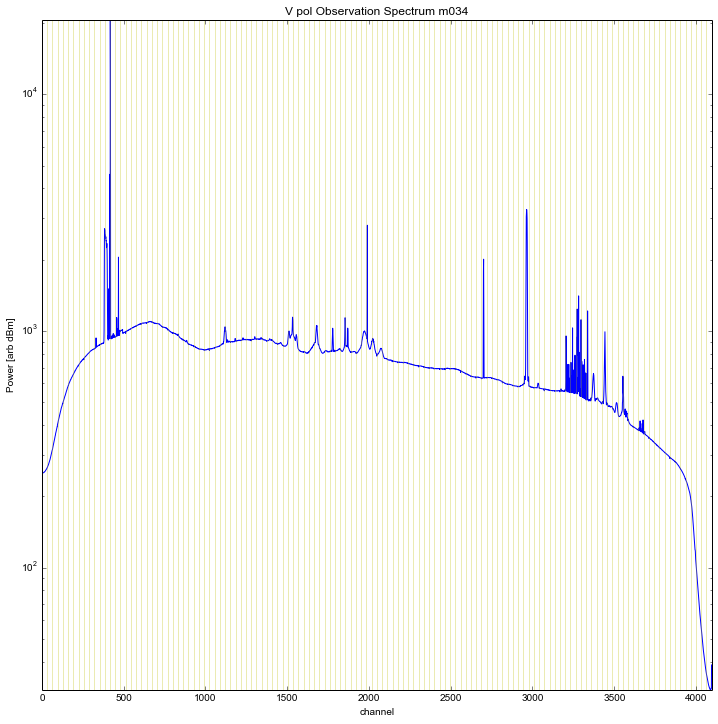

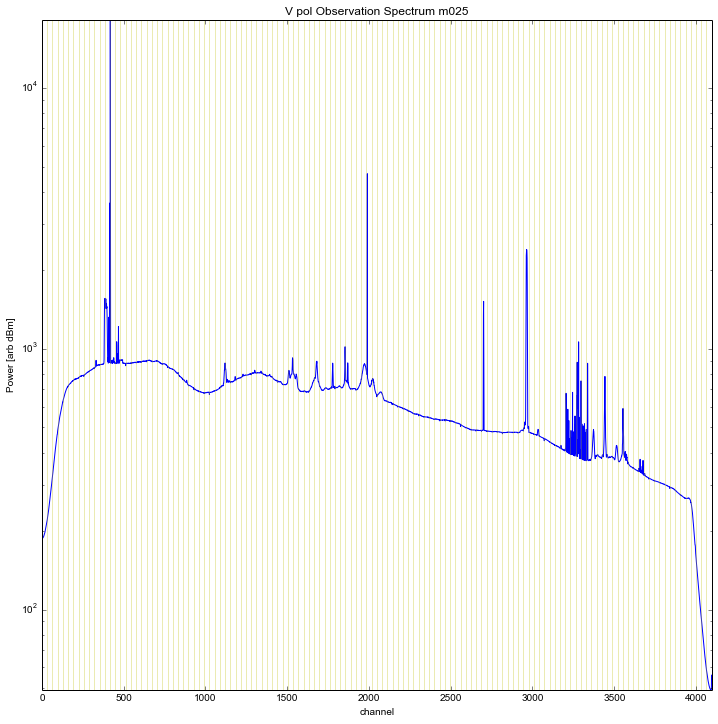

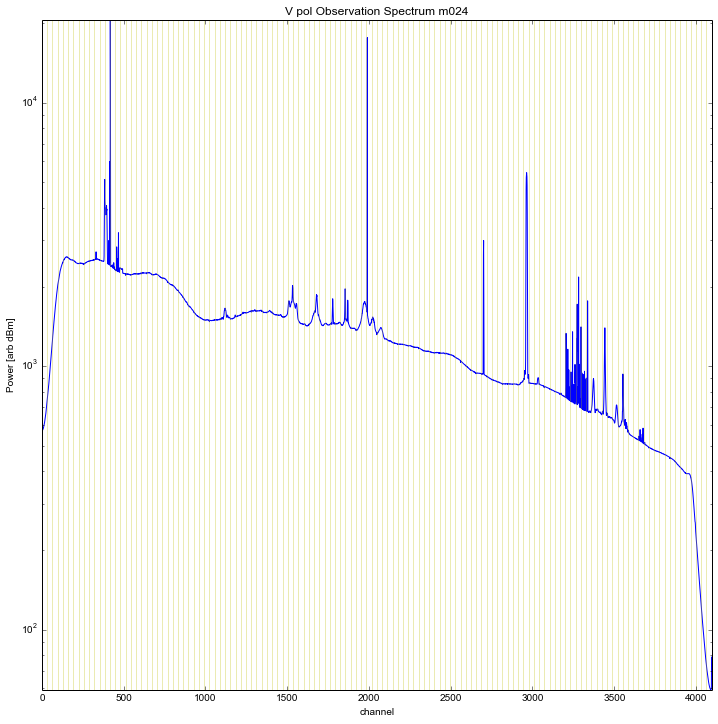

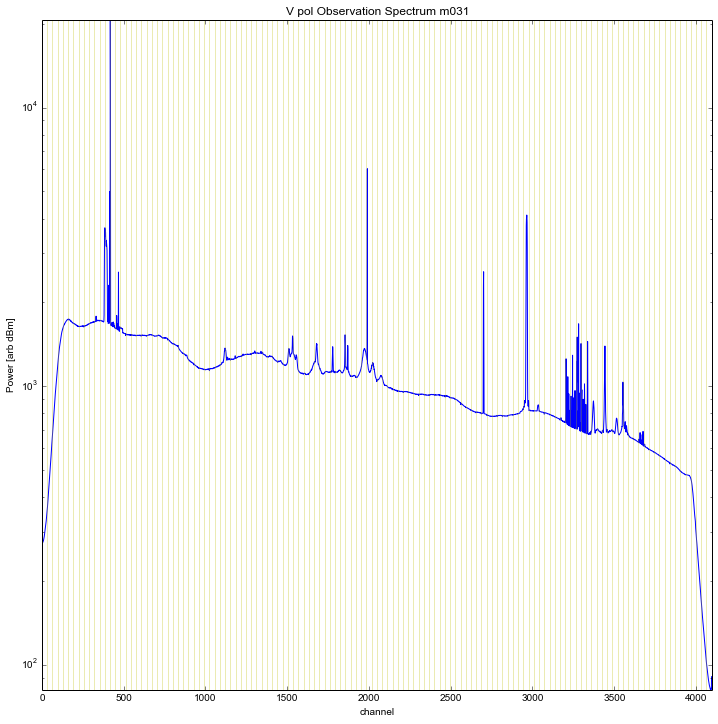

In [24]:
# Display passband
for ant in ants:
    visibilities={}
    # Observation
    for pol in ['H','V']:
        h5.select(reset='T')
#        h5.select(ants=ant.name,pol=pol,corrprods='auto',scans='track')
        h5.select(ants=ant.name,pol=pol,corrprods='auto',scans='scan')
        visibilities[pol] = h5.vis[:,:,:]
    plt.figure(figsize(12,12))
    plt.clf()
    plt.hold(True)
    plt.semilogy(channels, numpy.median(numpy.abs(visibilities['H']), axis=0), 'b')
    for ch in channels[::32]: pylab.axvline(x=ch, color='y', alpha=0.3)    
    plt.hold(False)
    plt.axis('tight')
    plt.xlabel('Channel')
    plt.ylabel('Power [arb dBm]')
    plt.title('H pol Observation Spectrum %s' %ant.name)
    plt.clf()
    plt.hold(True)
    plt.semilogy(channels, numpy.median(numpy.abs(visibilities['V']), axis=0), 'b')
    for ch in channels[::32]: pylab.axvline(x=ch, color='y', alpha=0.3) 
    plt.hold(False)
    plt.axis('tight')
    plt.xlabel('channel')
    plt.ylabel('Power [arb dBm]')
    plt.title('V pol Observation Spectrum %s' %ant.name)